<a href="https://colab.research.google.com/github/MuhammadMirafuddin17/PRIVATE/blob/main/Machine_Learning_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **LOAD DATASET**

In [ ]:
file_path = '/mnt/data/vgsales.csv'
df = pd.read_csv("vgsales.csv")

## **REVIEW BARIS PERTAMA**

In [ ]:
print("Dataset sample:")
print(df.head())

Dataset sample:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


## **MENGHITUNG KORELASI ANTAR KOLOM NUMERIK**

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


## **MENCARI KORELASI TERTINGGI DAN TERENDAH**

In [ ]:
correlation_unstacked = correlation_matrix.unstack()
correlation_sorted = correlation_unstacked.sort_values(ascending=False)

In [ ]:
corr_filtered = correlation_sorted[correlation_sorted != 1]

highest_corr = corr_filtered.idxmax()
highest_value = corr_filtered.max()
lowest_corr = corr_filtered.idxmin()
lowest_value = corr_filtered.min()

In [ ]:
print(f"\nKorelasi Tertinggi: {highest_corr} dengan nilai {highest_value}")
print(f"Korelasi Terendah: {lowest_corr} dengan nilai {lowest_value}")


Korelasi Tertinggi: ('NA_Sales', 'Global_Sales') dengan nilai 0.9410473571255572
Korelasi Terendah: ('Global_Sales', 'Rank') dengan nilai -0.4274066079886847


## **PERHITUNGAN KORELASI UNTUK DUA KOLOM TERTENTU**

In [ ]:
col1 = highest_corr[0]
col2 = highest_corr[1]

def manual_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(sum((x - x_mean)**2) * sum((y - y_mean)**2))
    return numerator / denominator

manual_corr_value = manual_correlation(df[col1].dropna(), df[col2].dropna())
print(f"\nPerhitungan manual korelasi antara {col1} dan {col2}: {manual_corr_value}")


Perhitungan manual korelasi antara NA_Sales dan Global_Sales: 0.9410473571253736


## **VISUALISASI CORELATION MATRIX**

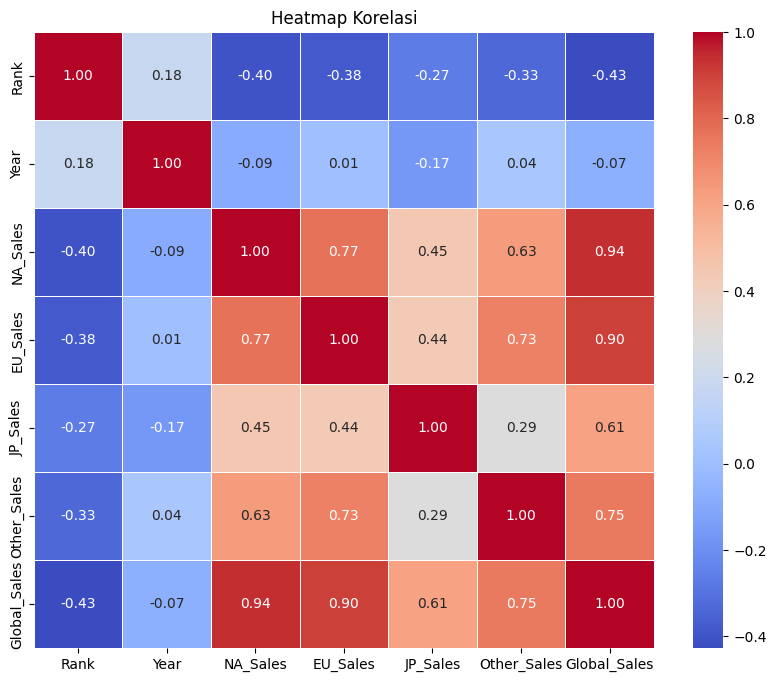

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

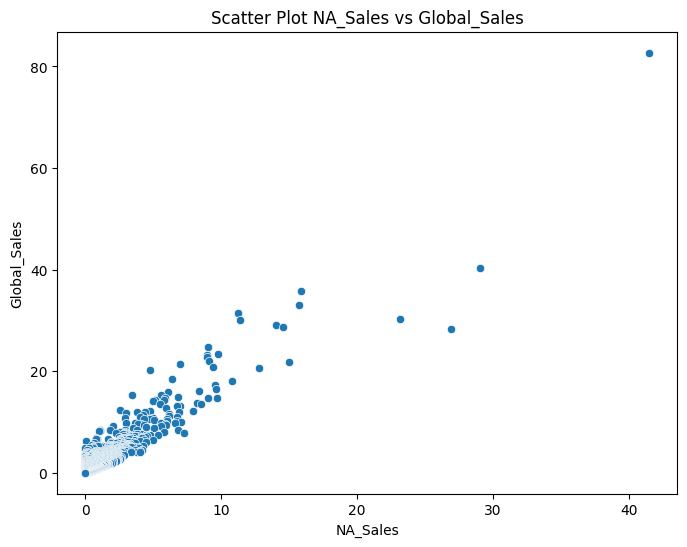

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[col1], y=df[col2])
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Scatter Plot {col1} vs {col2}')
plt.show()